In [2]:
import pandas as pd 
import numpy as np 
import pyodbc 
import  matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [3]:
conn_str = (
    'DRIVER={ODBC Driver 17 for SQL Server};'
    'SERVER=DESKTOP-PRRVP58\SQLEXPRESS;'
    'DATABASE=instant;'
    'Trusted_Connection=yes;'
)


In [4]:
conn = pyodbc.connect(conn_str)

In [5]:
query = "SELECT * FROM dbo.shopping_trends"
df = pd.read_sql(query, conn)

df 

,Customer_ID,Age,Gender,Item_Purchased,Category,Purchase_Amount_USD,Location,Size,Color,Season,Review_Rating,Subscription_Status,Payment_Method,Shipping_Type,Discount_Applied,Promo_Code_Used,Previous_Purchases,Preferred_Payment_Method,Frequency_of_Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,Cash,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,PayPal,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Credit Card,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,PayPal,Express,No,No,24,Venmo,Weekly


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item_Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase_Amount_USD       3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review_Rating             3900 non-null   float64
 11  Subscription_Status       3900 non-null   object 
 12  Payment_Method            3900 non-null   object 
 13  Shipping_Type             3900 non-null   object 
 14  Discount

In [7]:
df[["Customer_ID"]].duplicated().sum()

0

In [8]:
df.describe()

,Customer_ID,Age,Purchase_Amount_USD,Review_Rating,Previous_Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


In [9]:
numeric_cols = df.select_dtypes(include='number').columns

numeric_cols = [col for col in numeric_cols if 'id' not in col.lower()]

outlier_bounds = {}

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outlier_bounds[col] = {
        'Q1': Q1,
        'Q3': Q3,
        'IQR': IQR,
        'Lower Bound': lower_bound,
        'Upper Bound': upper_bound
    }

outlier_bounds_df = pd.DataFrame(outlier_bounds).T
outlier_bounds_df


,Q1,Q3,IQR,Lower Bound,Upper Bound
Age,31.0,57.0,26.0,-8.00,96.00
Purchase_Amount_USD,39.0,81.0,42.0,-24.00,144.00
Review_Rating,3.1,4.4,1.3,1.15,6.35
Previous_Purchases,13.0,38.0,25.0,-24.50,75.50


In [10]:
for col in df.select_dtypes(include='object'):
    print(f"\nColumn: {col}")
    value_counts = df[col].value_counts(normalize=True) * 100
    value_counts = value_counts.round(2).astype(str) + '%'
    print(value_counts)


Column: Gender
Gender
Male      68.0%
Female    32.0%
Name: proportion, dtype: object

Column: Item_Purchased
Item_Purchased
Blouse        4.38%
Jewelry       4.38%
Pants         4.38%
Shirt         4.33%
Dress         4.26%
Sweater       4.21%
Jacket        4.18%
Belt          4.13%
Sunglasses    4.13%
Coat          4.13%
Sandals        4.1%
Socks         4.08%
Skirt         4.05%
Shorts        4.03%
Scarf         4.03%
Hat           3.95%
Handbag       3.92%
Hoodie        3.87%
Shoes         3.85%
T-shirt       3.77%
Sneakers      3.72%
Boots         3.69%
Backpack      3.67%
Gloves        3.59%
Jeans         3.18%
Name: proportion, dtype: object

Column: Category
Category
Clothing       44.54%
Accessories    31.79%
Footwear       15.36%
Outerwear       8.31%
Name: proportion, dtype: object

Column: Location
Location
Montana           2.46%
California        2.44%
Idaho             2.38%
Illinois          2.36%
Alabama           2.28%
Minnesota         2.26%
Nebraska          2.23%


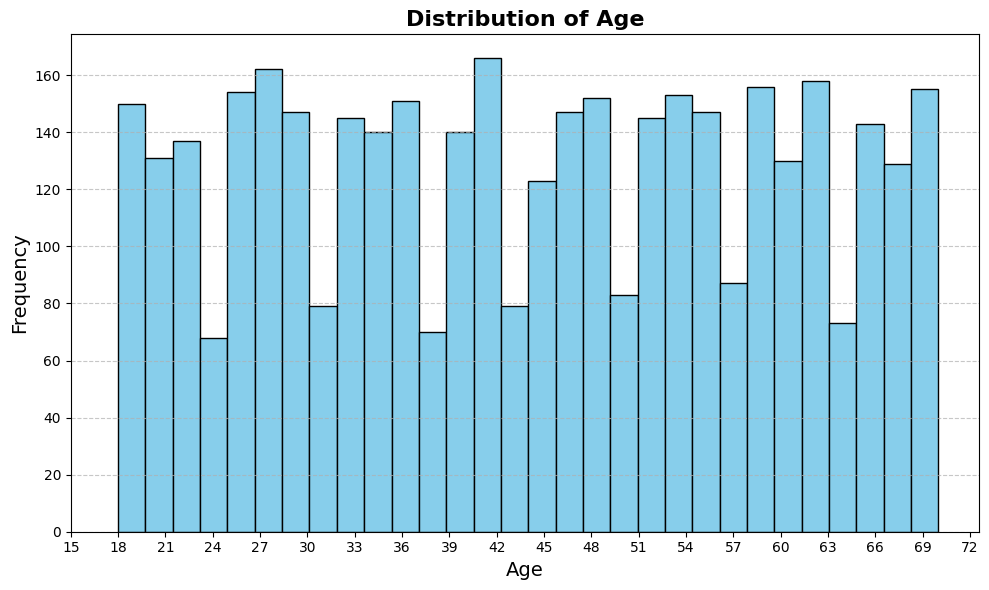

In [11]:
plt.figure(figsize=(10, 6))
df['Age'].plot.hist(bins=30, color='skyblue', edgecolor='black')

plt.title('Distribution of Age', fontsize=16, fontweight='bold')
plt.xlabel('Age', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Set x-ticks at intervals of 5
plt.xticks(ticks=range(15, 75, 3))  # 0, 5, 10, ..., 70

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [12]:
bins = list(range(18, 71, 4))  # [18, 23, 28, ..., 68, 73]
labels = [f'{i}-{i+3}' for i in bins[:-1]]

df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
df['Age Group'].value_counts().sort_index()

Age Group
18-21    281
22-25    290
26-29    307
30-33    295
34-37    291
38-41    296
42-45    282
46-49    299
50-53    298
54-57    317
58-61    286
62-65    303
66-69    288
Name: count, dtype: int64

In [13]:
df.groupby('Age Group')[['Purchase_Amount_USD']].agg(['mean','max','min','sum'])

Purchase_Amount_USD                
                         mean  max min    sum
Age Group                                    
18-21               60.238434  100  20  16927
22-25               61.044828  100  20  17703
26-29               59.527687  100  20  18275
30-33               60.996610  100  20  17994
34-37               59.522337  100  20  17321
38-41               59.236486  100  20  17534
42-45               58.340426  100  20  16452
46-49               58.411371  100  20  17465
50-53               62.208054  100  20  18538
54-57               60.280757  100  20  19109
58-61               58.639860  100  20  16771
62-65               59.696370  100  20  18088
66-69               59.354167  100  20  17094

In [14]:
df.groupby('Age Group')[['Previous_Purchases']].agg(['mean','max','min'])

Previous_Purchases        
                        mean max min
Age Group                           
18-21              23.224199  50   1
22-25              26.000000  50   1
26-29              24.807818  50   1
30-33              24.786441  50   1
34-37              25.171821  50   1
38-41              25.391892  50   1
42-45              24.652482  50   1
46-49              24.545151  50   1
50-53              26.184564  50   1
54-57              26.788644  50   1
58-61              25.716783  50   1
62-65              25.785479  50   1
66-69              26.527778  50   1

In [15]:
pd.crosstab(df['Age Group'],df['Category'])

Category,Accessories,Clothing,Footwear,Outerwear
Age Group,,,,
18-21,79,139,37,26
22-25,93,130,42,25
26-29,103,135,48,21
30-33,91,146,37,21
34-37,100,121,47,23
38-41,103,128,37,28
42-45,95,126,41,20
46-49,83,127,58,31
50-53,79,128,68,23


In [16]:
pd.crosstab(df['Item_Purchased'],df[df['Category']=='Clothing']['Category']).sort_values(by='Clothing', ascending=False)

Category,Clothing
Item_Purchased,
Blouse,171
Pants,171
Shirt,169
Dress,166
Sweater,164
Socks,159
Skirt,158
Shorts,157
Hoodie,151


In [17]:
pd.crosstab(df['Item_Purchased'],df[df['Category']=='Accessories']['Category']).sort_values(by='Accessories', ascending=False)

Category,Accessories
Item_Purchased,
Jewelry,171
Belt,161
Sunglasses,161
Scarf,157
Hat,154
Handbag,153
Backpack,143
Gloves,140


In [18]:
pd.crosstab(df['Item_Purchased'],df[df['Category']=='Footwear']['Category']).sort_values(by='Footwear', ascending=False)

Category,Footwear
Item_Purchased,
Sandals,160
Shoes,150
Sneakers,145
Boots,144


In [19]:
pd.crosstab(df['Item_Purchased'],df[df['Category']=='Footwear']['Category']).sort_values(by='Footwear', ascending=False)

Category,Footwear
Item_Purchased,
Sandals,160
Shoes,150
Sneakers,145
Boots,144


In [20]:
pd.crosstab(df['Item_Purchased'],df[df['Category']=='Outerwear']['Category']).sort_values(by='Outerwear', ascending=False)

Category,Outerwear
Item_Purchased,
Jacket,163
Coat,161


In [21]:
df.groupby('Category')[['Purchase_Amount_USD']].agg(['mean','max','min','sum','count'])

Purchase_Amount_USD                       
                           mean  max min     sum count
Category                                              
Accessories           59.838710  100  20   74200  1240
Clothing              60.025331  100  20  104264  1737
Footwear              60.255426  100  20   36093   599
Outerwear             57.172840  100  20   18524   324

In [22]:
pd.crosstab(df['Gender'],df['Category'])

Category,Accessories,Clothing,Footwear,Outerwear
Gender,,,,
Female,392,556,199,101
Male,848,1181,400,223


In [23]:
pd.crosstab(df['Frequency_of_Purchases'],df['Shipping_Type'])

Shipping_Type,2-Day Shipping,Express,Free Shipping,Next Day Air,Standard,Store Pickup
Frequency_of_Purchases,,,,,,
Annually,84,96,112,81,107,92
Bi-Weekly,87,100,82,99,89,90
Every 3 Months,97,99,101,109,75,103
Fortnightly,89,88,79,86,107,93
Monthly,95,84,90,102,91,91
Quarterly,93,85,101,87,98,99
Weekly,82,94,110,84,87,82


In [24]:
pd.crosstab(df['Promo_Code_Used'],df['Subscription_Status'])

Subscription_Status,No,Yes
Promo_Code_Used,,
No,2223,0
Yes,624,1053


In [25]:
pd.crosstab(df['Gender'],df['Subscription_Status'])

Subscription_Status,No,Yes
Gender,,
Female,1248,0
Male,1599,1053


In [26]:
pd.crosstab(df['Discount_Applied'],df['Subscription_Status'])

Subscription_Status,No,Yes
Discount_Applied,,
No,2223,0
Yes,624,1053


In [27]:
df.groupby('Category')[['Review_Rating']].agg(['mean','max','min'])

Review_Rating          
                     mean  max  min
Category                           
Accessories      3.768629  5.0  2.5
Clothing         3.723143  5.0  2.5
Footwear         3.790651  5.0  2.5
Outerwear        3.746914  5.0  2.5

In [28]:
df.groupby('Gender')[['Review_Rating']].agg(['mean','max','min'])

Review_Rating          
                mean  max  min
Gender                        
Female      3.741426  5.0  2.5
Male        3.753959  5.0  2.5

In [29]:
df.groupby('Discount_Applied')[['Review_Rating']].agg(['mean','max','min'])

Review_Rating          
                          mean  max  min
Discount_Applied                        
No                    3.757715  5.0  2.5
Yes                   3.739654  5.0  2.5

In [30]:
pd.crosstab(df['Gender'],df['Size'])

Size,L,M,S,XL
Gender,,,,
Female,337,590,187,134
Male,716,1165,476,295


In [31]:
bins = list(range(2, 6, 1)) 
labels = [f'{i}-{i+1}' for i in bins[:-1]]

df['Rating Group'] = pd.cut(df['Review_Rating'], bins=bins, labels=labels, right=False)
df['Rating Group'].value_counts().sort_index()

Rating Group
2-3     685
3-4    1571
4-5    1576
Name: count, dtype: int64

In [66]:
df['Purchase_Amount_USD'].sum()

233081

In [33]:
import pandas as pd
import pyodbc

# SQL Connection
conn_str = (
    'DRIVER={ODBC Driver 17 for SQL Server};'
    'SERVER=DESKTOP-PRRVP58\SQLEXPRESS;'
    'DATABASE=instant;'
    'Trusted_Connection=yes;'
)
conn = pyodbc.connect(conn_str)

# Query
query = "SELECT * FROM dbo.shopping_trends"
df = pd.read_sql(query, conn)

# Export to fixed filename (Power BI reads from this)
export_path = "shopping_trends_export.csv"
df.to_csv(export_path, index=False)

conn.close()
